In [1639]:
import pandas as pd
import numpy as np

## Process and study data

In [1640]:
df = pd.read_csv("train.csv")
df.shape # returns rows x columns

(891, 12)

In [1641]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1642]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1643]:
df.values # but this is not important as the df command shows us the first ten rows

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], shape=(891, 12), dtype=object)

### Data Analisis

Se debe de tener distintos puntos a tener en cuenta:
1. Buscar valores `null`.
2. Comprobar la distribución de variables.
   a. Variables númericas: histogramas y boxplots
   b. Variables categóricas: conteo de valores únicos
3. Correlaciones y relaciones
4. Cruzar variables con la variable objetivo Y
5. Detectar valores atípicos
6. Convertir variables categóricas en formatos usables
7. Crear nuevas características: agrupar edades en rangos, etc

In [1644]:
# Valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1645]:
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [1646]:
# La columna "Cabin" tiene un 80% de valores nulo, no es representativa
# Debemos de eliminarla o modificarla
"""df.drop(columns=["Cabin"], inplace=True)"""
df['Cabin'] = df['Cabin'].apply(lambda x: 1 if pd.notnull(x) else 0)
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


Hemos borrado la columna "Cabin", pero eso no significa que debamos hacerlo. Es recomendable rellenar dicha columna con:
- Media: cuando la distribución es normal
- Mediana: cuando hay valores atípicos (outliers)
- Moda: para datos categóricos

### Graph plotting

In [1647]:
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for outliers

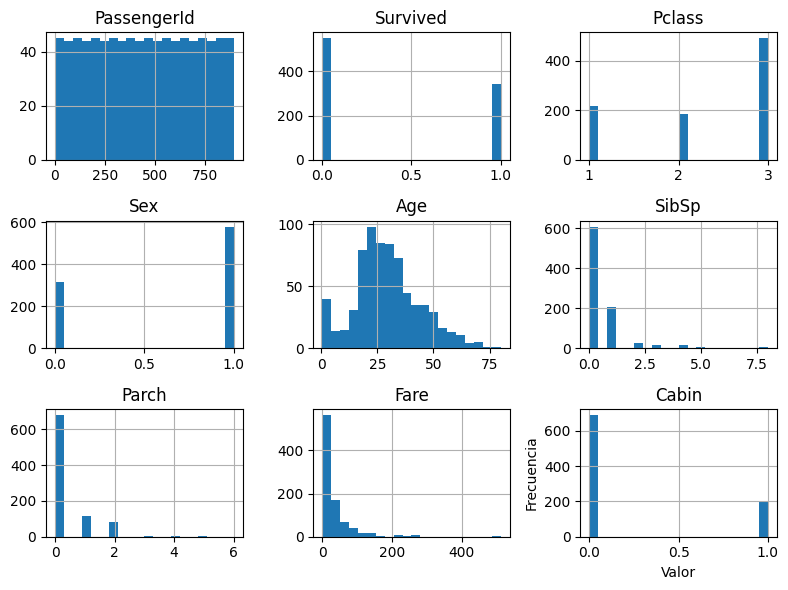

In [1648]:
import matplotlib.pyplot as plt  

# Histograms of the entire document
df.hist(bins=20, figsize=(8, 6))
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

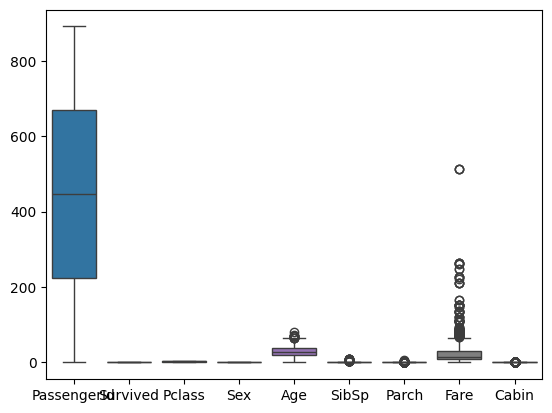

In [1649]:
# Outliers detection
sns.boxplot(data=df)
plt.show()

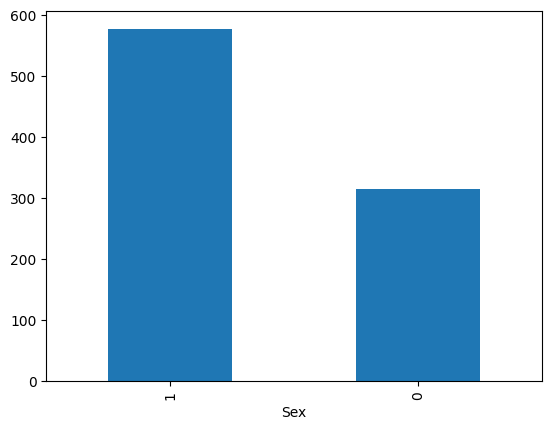

In [1650]:
# Gráfico de barras para variables categóricas
df['Sex'].value_counts().plot(kind='bar')
plt.show()

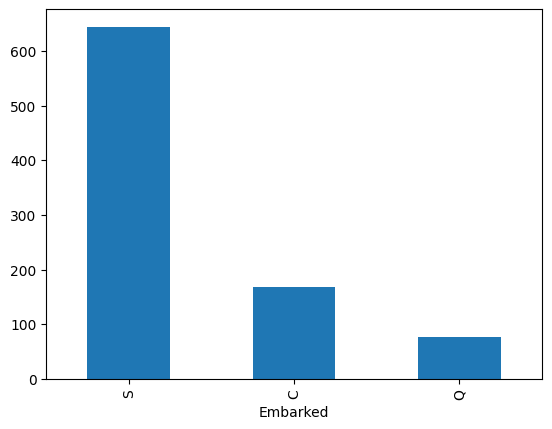

In [1651]:
df['Embarked'].value_counts().plot(kind='bar')
plt.show()

### Correlación entre variables 

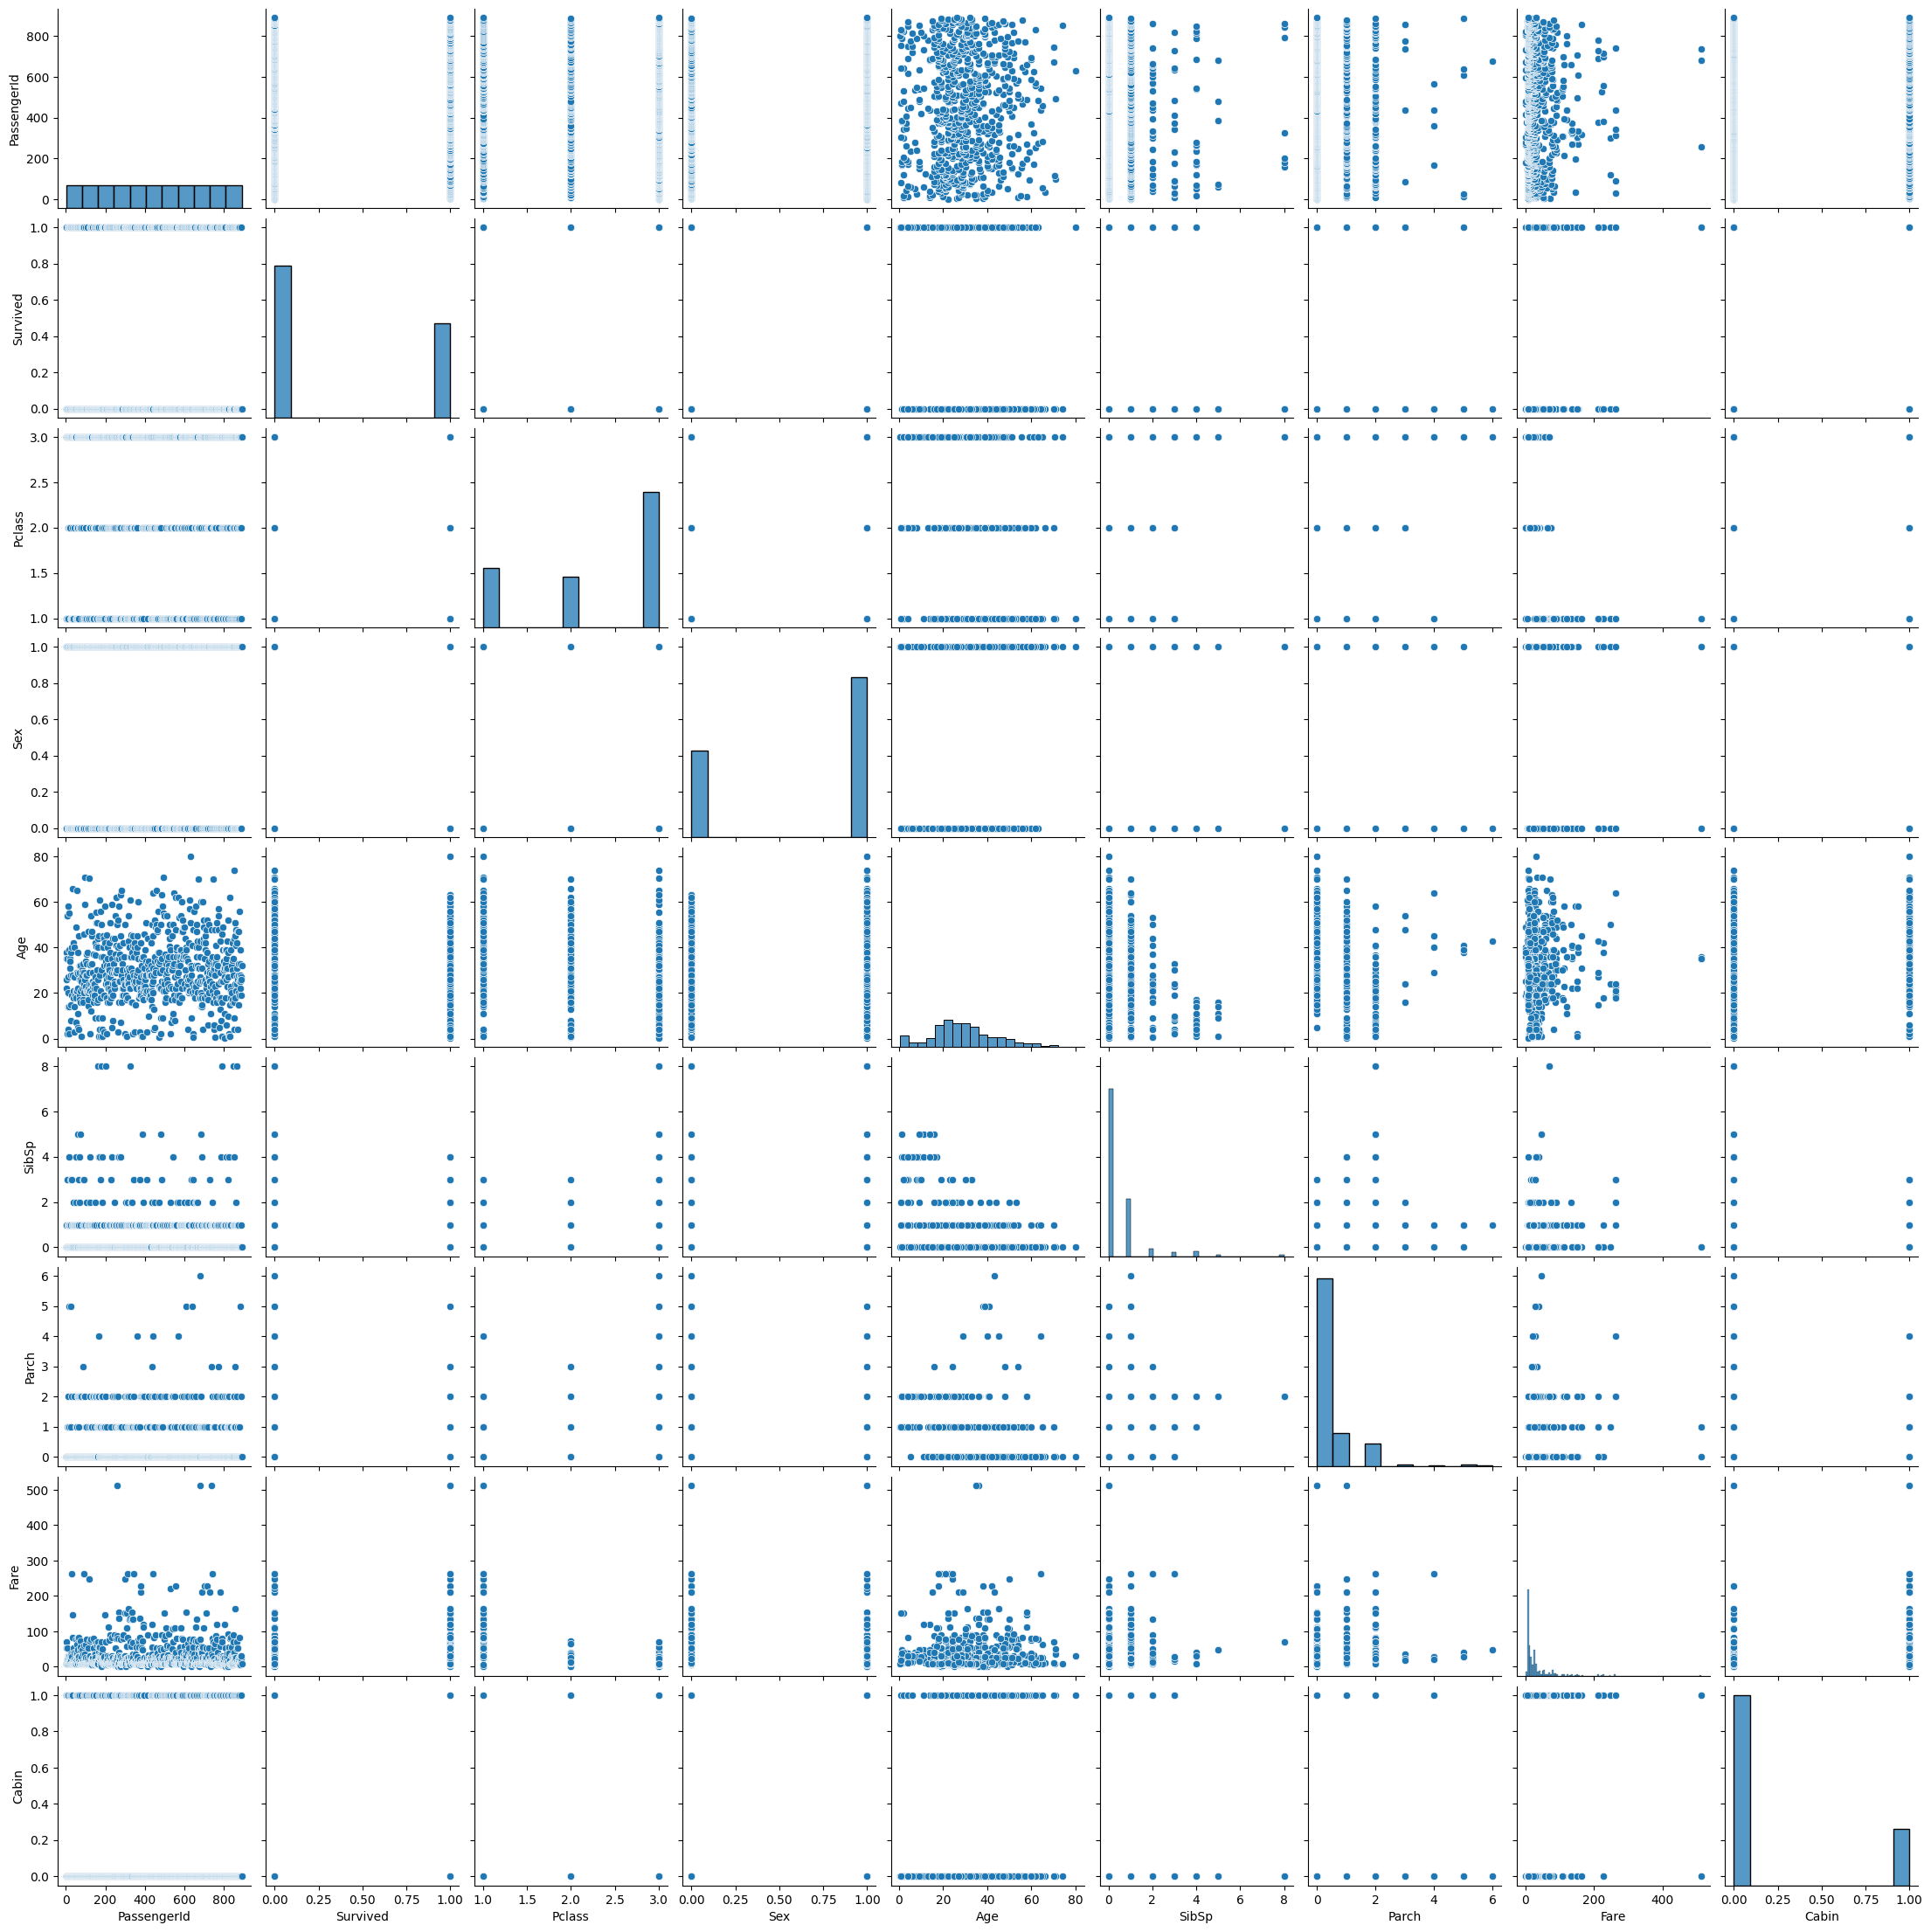

In [1652]:
df_numeric = df.select_dtypes(include=['number'])

sns.pairplot(df_numeric)
plt.show()

Vemos que no existe ninguna correlación 

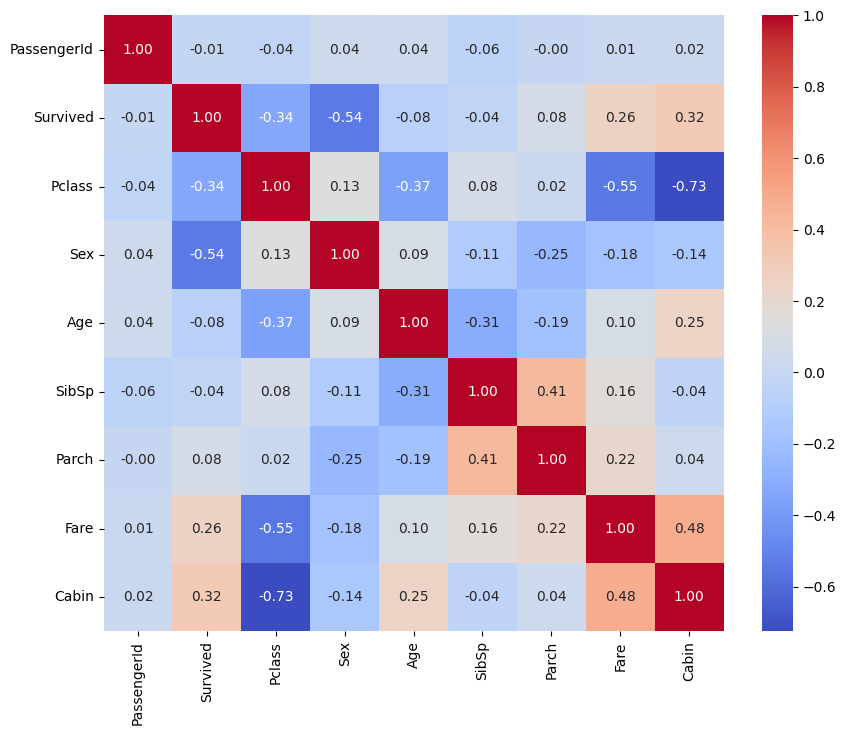

In [1653]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [1654]:
df[["Survived", "Sex"]].corr()


,Survived,Sex
Survived,1.000000,-0.543351
Sex,-0.543351,1.000000


In [1655]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


In [1656]:
# Join SibSp and Parch
df["FamilySize"] = df["Parch"] + df["SibSp"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,0


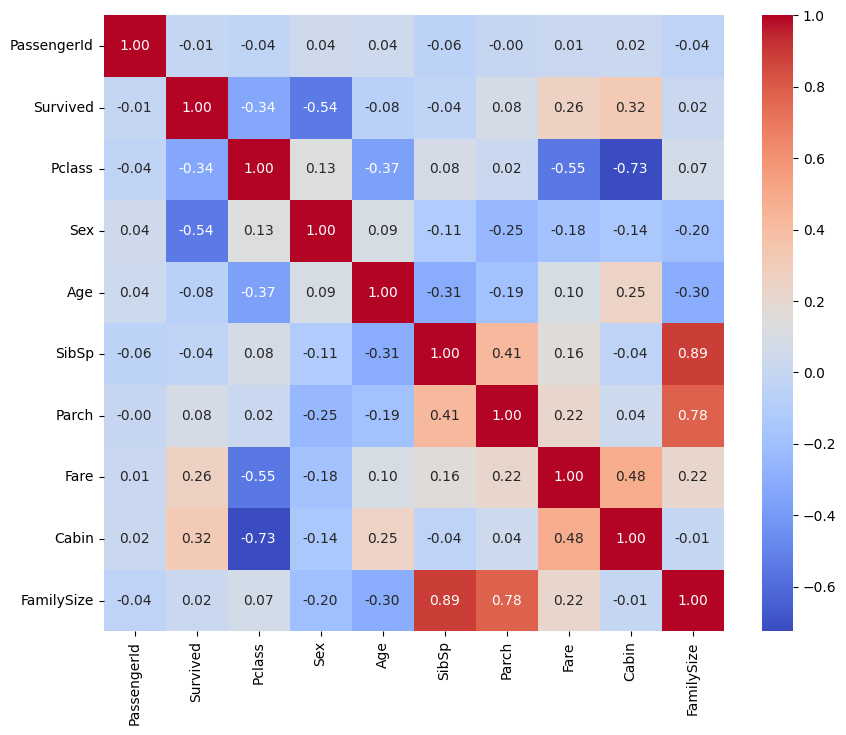

In [1657]:
# Check correlations again
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [1658]:
df[['FamilySize', 'SibSp', 'Parch']].corr()

,FamilySize,SibSp,Parch
FamilySize,1.000000,0.890712,0.783111
SibSp,0.890712,1.000000,0.414838
Parch,0.783111,0.414838,1.000000


Vemos que existe multicolinealidad entre SibSp y Parch. Como captura la importancia de la suma de las otras dos, las eliminamos


In [1659]:
df = df.drop(['SibSp', 'Parch'], axis=1) # drop data

In [1660]:
print(df.head())
print(df['Embarked'])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  \
0                            Braund, Mr. Owen Harris    1  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2                             Heikkinen, Miss. Laina    0  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4                           Allen, Mr. William Henry    1  35.0   

             Ticket     Fare  Cabin Embarked  FamilySize  
0         A/5 21171   7.2500      0        S           1  
1          PC 17599  71.2833      1        C           1  
2  STON/O2. 3101282   7.9250      0        S           0  
3            113803  53.1000      1        S           1  
4            373450   8.0500      0        S           0  
0      S
1      C
2      S

In [1661]:
# One-Hot Encoding para variables del tipo subsets categóricos
df = pd.get_dummies(df, columns=["Embarked"], drop_first=False)
df["Embarked_Q"] = df["Embarked_Q"].apply(lambda x: 1 if x == True else 0)
df["Embarked_S"] = df["Embarked_S"].apply(lambda x: 1 if x == True else 0)
df["Embarked_C"] = df["Embarked_C"].apply(lambda x: 1 if x == True else 0)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,0,0,1


## Process Names
Names are important here. Why? Not the names, but the prefix: Mrs, Miss, Mr... We can look for the correlation between the title they had and if they survived or not.

In [1662]:
import re

def get_title(name):
    """
    Use a regular expression to search for a title.  Titles always consist of
    capital and lowercase letters, and end with a period.
    
    Takes a name as input and returns the title string as output
    """

    title_search = re.search(' ([A-Za-z]+)\\.', name)
    if title_search:
        return title_search.group(1)
    return ""


df["Title"] = df["Name"].apply(get_title) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,1,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,1,1,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,0,0,1,Mr


In [1663]:
# And lets check again the correlation
titles = df["Title"].unique()
for i in titles:
    print(i)


Mr
Mrs
Miss
Master
Don
Rev
Dr
Mme
Ms
Major
Lady
Sir
Mlle
Col
Capt
Countess
Jonkheer


In [1664]:
# One-Hot Encoding para variables del tipo subsets categóricos
df = pd.get_dummies(df, columns=["Title"], drop_first=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,1,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,1,1,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,...,False,False,False,False,False,True,False,False,False,False


In [1665]:
for title in titles:
    df["Title_"+title] = df["Title_"+title].apply(lambda x: 1 if x == True else 0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,1,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,1,1,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,...,0,0,0,0,0,1,0,0,0,0


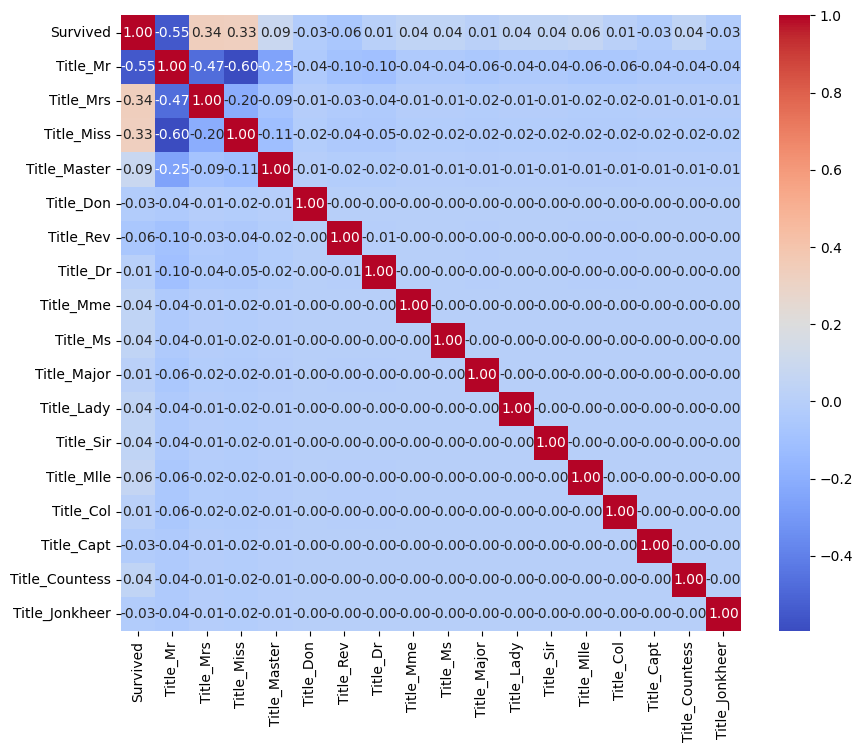

In [1666]:
plt.figure(figsize=(10, 8))
toCorr = ["Survived"]
for title in titles:
    toCorr.append("Title_"+title)
work = df[toCorr]
sns.heatmap(work.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Vemos que efectivamente hay una correlación en una parte de los títulos (ya que el resto eran muy pocos)

In [1667]:
saved = df.copy()
df = df.drop(columns=["Name", "Ticket"])
saved.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Capt', 'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')

In [1668]:
df.isna().any(axis=1)
df["Age"].round(1)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,1,22.0,7.2500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,0,38.0,71.2833,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,0,26.0,7.9250,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,0,35.0,53.1000,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,1,35.0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1669]:
df.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

## Obtain Train X & Y datas

In [1670]:
# We have the train - test set. But we want to have X, Y train. Then, we must modify the content of the dataframe
X_train = df.drop(columns=["Survived"])
X_train.head()
print(X_train.shape)

(891, 27)


In [1671]:
Y_train = df["Survived"]
Y_train.head()
print(Y_train.shape)

(891,)


## Create our model

In [1672]:
# Regression model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [1673]:
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

/home/jmartinpizarro/Desktop/ia-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Process Test Data

In [1674]:
df_test = pd.read_csv("test.csv")
df_test.head()
# We have to have the same format for both .csv

# modify sex, modify age, SibSp and Parch, Cabin and Embarked. And Title.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1675]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,1,22.0,7.2500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,0,38.0,71.2833,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,0,26.0,7.9250,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,0,35.0,53.1000,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,1,35.0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1676]:
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: 1 if pd.notnull(x) else 0)
df_test["Sex"] = df_test["Sex"].apply(lambda x: 1 if x == "male" else 0)
df_test["FamilySize"] = df_test["Parch"] + df_test["SibSp"]
df_test = df_test.drop(['SibSp', 'Parch'], axis=1) # drop data

df_test = pd.get_dummies(df_test, columns=["Embarked"], drop_first=False)
df_test["Embarked_Q"] = df_test["Embarked_Q"].apply(lambda x: 1 if x == True else 0)
df_test["Embarked_S"] = df_test["Embarked_S"].apply(lambda x: 1 if x == True else 0)
df_test["Embarked_C"] = df_test["Embarked_C"].apply(lambda x: 1 if x == True else 0)

titles


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1677]:
df_test["Title"] = saved["Name"].apply(get_title) 
df_test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme'],
      dtype=object)

In [1678]:
# One-Hot Encoding para variables del tipo subsets categóricos
df_test = pd.get_dummies(df_test, columns=["Title"], drop_first=False)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Don,Title_Dr,Title_Master,Title_Miss,Title_Mme,Title_Mr,Title_Mrs,Title_Rev
0,892,3,"Kelly, Mr. James",1,34.5,330911,7.8292,0,0,0,1,0,False,False,False,False,False,True,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,0,1,0,0,1,False,False,False,False,False,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,0,0,0,1,0,False,False,False,True,False,False,False,False
3,895,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,0,0,0,0,1,False,False,False,False,False,False,True,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,0,2,0,0,1,False,False,False,False,False,True,False,False


In [1679]:
for title in titles:
    df_test["Title_"+title] = saved["Title_"+title].apply(lambda x: 1 if x == True else 0)
    

In [1680]:
len(df_test.columns)

29

In [1681]:
len(df.columns)

28

In [1682]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,Embarked_C,...,Title_Rev,Title_Ms,Title_Major,Title_Lady,Title_Sir,Title_Mlle,Title_Col,Title_Capt,Title_Countess,Title_Jonkheer
0,892,3,"Kelly, Mr. James",1,34.5,330911,7.8292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,363272,7.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,240276,9.6875,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,315154,8.6625,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,3101298,12.2875,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [1683]:
df_test = df_test.drop(columns=["Name", "Ticket"])

In [1684]:
df_test.isna().sum()
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [1685]:
df_test["Age"].round(1)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S,...,Title_Rev,Title_Ms,Title_Major,Title_Lady,Title_Sir,Title_Mlle,Title_Col,Title_Capt,Title_Countess,Title_Jonkheer
0,892,3,1,34.5,7.8292,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,0,47.0,7.0000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,894,2,1,62.0,9.6875,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,1,27.0,8.6625,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,896,3,0,22.0,12.2875,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Predict 

In [1686]:
df_test = df_test[X_train.columns]

In [1687]:
Y_pred = model.predict(df_test)

In [1688]:
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [1689]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred  # Las predicciones binarias (0 o 1)
})
submission.to_csv('submission.csv', index=False)